# Predict Dress Clothes 

In [1]:
import tensorflow as tf
from tensorflow import keras
import datetime
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import cv2

# Import Dataset

We will use 60,000 images to train the network and 10,000 photos to evaluate how accurately the network learned to classify the images. We can access Fashion MNIST directly from TensorFlow.

We import and upload Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

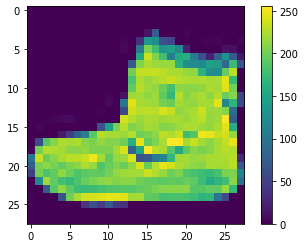

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The labels are a matrix of whole numbers, ranging from 0 to 9. These correspond to the kind of clothing that the image represents:

In [4]:
class_names = ["T-shirt", "Pants", "sweater", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "boots"]

# Data exploration 

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_labels.shape

(10000,)

In [9]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# Data pre-processing

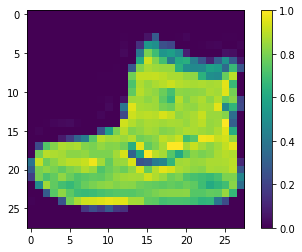

In [10]:
train_images = train_images / 255
test_images = test_images / 255

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

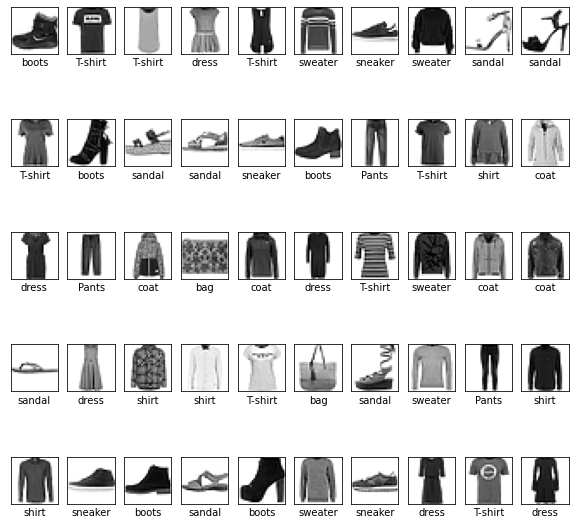

In [11]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(15, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compile Model

In [15]:
model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [16]:
checkpoint_path = "checkpoint/check";
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq = 1)

model.fit(train_images, 
          train_labels, 
          epochs = 50, 
          validation_data = (test_images, test_labels),
          callbacks = [cp_callbacks, tensorboard_callback])

Epoch 1/50
1875/1875 [==============================] - 2s 903us/step - loss: 0.6136 - accuracy: 0.7925 - val_loss: 0.4780 - val_accuracy: 0.8340

Epoch 00001: saving model to checkpoint\check
Epoch 2/50
1875/1875 [==============================] - 2s 852us/step - loss: 0.4451 - accuracy: 0.8446 - val_loss: 0.4908 - val_accuracy: 0.8297

Epoch 00002: saving model to checkpoint\check
Epoch 3/50
1875/1875 [==============================] - 1s 757us/step - loss: 0.4159 - accuracy: 0.8541 - val_loss: 0.4713 - val_accuracy: 0.8328oss: 0

Epoch 00003: saving model to checkpoint\check
Epoch 4/50
1875/1875 [==============================] - 1s 794us/step - loss: 0.4027 - accuracy: 0.8587 - val_loss: 0.4477 - val_accuracy: 0.8442

Epoch 00004: saving model to checkpoint\check
Epoch 5/50
1875/1875 [==============================] - 1s 768us/step - loss: 0.3880 - accuracy: 0.8619 - val_loss: 0.4337 - val_accuracy: 0.8484

Epoch 00005: saving model to checkpoint\check
Epoch 6/50
1875/1875 [=======

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Precition: ", test_acc)

313/313 [==============================] - 0s 533us/step - loss: 0.4096 - accuracy: 0.8639
Precition:  0.8639000058174133


# Prediction

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[1]

array([7.5846961e-05, 1.7605760e-17, 9.9580753e-01, 1.3488039e-18,
       3.9522718e-03, 6.0178058e-29, 1.6434648e-04, 1.5591778e-31,
       4.9268589e-09, 8.4349939e-35], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

# External Picture

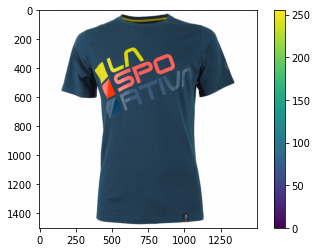

In [21]:
# Load picture from Internet

response = requests.get("https://www.bfgcdn.com/1500_1500_90/016-1833-0311/la-sportiva-square-t-shirt-t-shirt.jpg")
img = Image.open(BytesIO(response.content))
np_img = np.array(img)

# Show Picture

plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

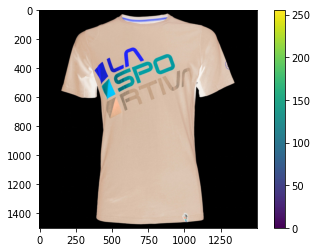

In [22]:
# inverse picture
np_img = 255 - np_img

plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
# Remove picture color
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.333,0.333,0.333,])


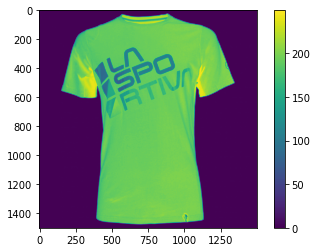

In [24]:
sg_image = rgb2gray(np_img)

plt.figure()
plt.imshow(sg_image)
plt.colorbar()
plt.grid(False)
plt.show()

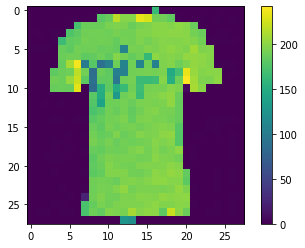

In [25]:
# Resize the picture
res = cv2.resize(sg_image, dsize = (28,28),interpolation = cv2.INTER_CUBIC)

plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

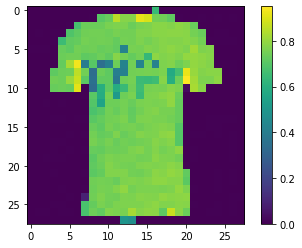

In [26]:
# Rescaling picture
res = res / 255

plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
x = np.zeros((1,28,28))
x[0] = np.array(res)

In [28]:
predictions = model.predict(x)
predictions

array([[9.9637991e-01, 3.6007770e-12, 1.5886854e-04, 1.2321790e-06,
        8.5336787e-09, 1.3949688e-29, 3.4600515e-03, 2.9926421e-18,
        1.9868908e-10, 3.2893106e-24]], dtype=float32)

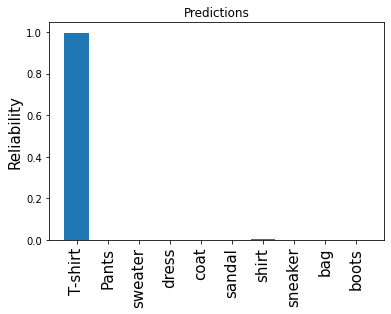

In [29]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel("Reliability", fontsize = 15)
plt.xticks(index, class_names, fontsize = 15, rotation = 90)
plt.title("Predictions")
plt.show()

# create new model and test it before training 

In [30]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(15, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [31]:
loss, acc = model2.evaluate(test_images, test_labels) 

313/313 [==============================] - 0s 599us/step - loss: 2.3450 - accuracy: 0.1483


In [32]:
# Recovery weights 
model2.load_weights(checkpoint_path)
oss, acc = model2.evaluate(test_images, test_labels) 
acc

313/313 [==============================] - 0s 564us/step - loss: 0.4096 - accuracy: 0.8639


0.8639000058174133